<a href="https://colab.research.google.com/github/skashyapsri/Absorbance-Prediction-Using-ML/blob/main/Absorbance_Prediction_for_Maize_Seed_Oil_Using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Absorbance Prediction for Maize Seed Oil Using ML

---



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/sandroj87/EVOODec/refs/heads/main/evoodec/spectra/mais_seed_oil.csv', sep=';')


In [3]:
data = data.rename(columns={'#Wavelength (nm)': 'Wavelength', ' Absorbance (a.u.)': 'Absorbance'})

In [4]:
data.head()

,Wavelength,Absorbance
0,720,0.000000
1,719,-0.001475
2,718,-0.000050
3,717,0.000475
4,716,0.002225


# Plotting Wavelength vs Absorbance (Rapeseed Oil)

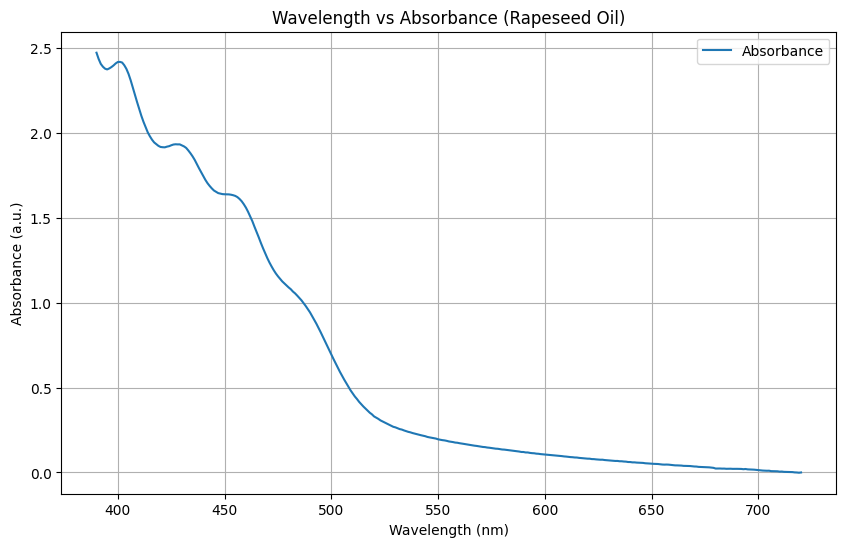

In [5]:
plt.figure(figsize=(10,6))
plt.plot(data['Wavelength'], data['Absorbance'], label='Absorbance')
plt.title('Wavelength vs Absorbance (Rapeseed Oil)')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance (a.u.)')
plt.grid(True)
plt.legend()
plt.show()

# Splitting Data for Training and Testing

In [6]:
X = data['Wavelength'].values.reshape(-1, 1)
y = data['Absorbance'].values

# Split the data into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to Evaluate Models

In [7]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    print(f"Model: {model.__class__.__name__}")
    print(f"Train MSE: {mean_squared_error(y_train, y_pred_train):.4f}")
    print(f"Test MSE: {mean_squared_error(y_test, y_pred_test):.4f}")
    print(f"Train R2: {r2_score(y_train, y_pred_train):.4f}")
    print(f"Test R2: {r2_score(y_test, y_pred_test):.4f}\n")

# Model 1: Partial Least Square (PLS) Regression

In [8]:
pls = PLSRegression(n_components=1)
evaluate_model(pls, X_train, X_test, y_train, y_test)

Model: PLSRegression
Train MSE: 0.1264
Test MSE: 0.1339
Train R2: 0.7916
Test R2: 0.7842



# Model 2: k-Nearest Neighbor (kNN)


In [9]:
knn = KNeighborsRegressor(n_neighbors=5)
evaluate_model(knn, X_train, X_test, y_train, y_test)

Model: KNeighborsRegressor
Train MSE: 0.0001
Test MSE: 0.0001
Train R2: 0.9999
Test R2: 0.9999



# Model 3: Linear Regression


In [10]:
lr = LinearRegression()
evaluate_model(lr, X_train, X_test, y_train, y_test)

Model: LinearRegression
Train MSE: 0.1264
Test MSE: 0.1339
Train R2: 0.7916
Test R2: 0.7842



# Model 4: Decision Tree Regressor

In [11]:
tree = DecisionTreeRegressor()
evaluate_model(tree, X_train, X_test, y_train, y_test)

Model: DecisionTreeRegressor
Train MSE: 0.0000
Test MSE: 0.0001
Train R2: 1.0000
Test R2: 0.9998



# Model 5: Random Forest Regressor


In [12]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
evaluate_model(rf, X_train, X_test, y_train, y_test)

Model: RandomForestRegressor
Train MSE: 0.0000
Test MSE: 0.0001
Train R2: 1.0000
Test R2: 0.9999



# Model Evaluation

In [13]:
models = [pls, knn, lr, tree, rf]
for model in models:
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    print(f"{model.__class__.__name__} CV MSE: {-cv_scores.mean():.4f}")

PLSRegression CV MSE: 0.1283
KNeighborsRegressor CV MSE: 0.0002
LinearRegression CV MSE: 0.1283
DecisionTreeRegressor CV MSE: 0.0002
RandomForestRegressor CV MSE: 0.0001


### The analysis shows that tree-based models, particularly Random Forest perform the best in terms of both training and test set performance, as well as 5-fold cross-validation MSE scores